In [15]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
path_ = "/content/drive/MyDrive/AI_Project/plant_notplant/Dataset"

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Set the path to the dataset folder
dataset_dir = path_

# Define the training and testing ratios
train_ratio = 0.8
test_ratio = 0.2

# Define the paths to the training and testing directories
train_dir = 'Dataset/train'
test_dir = 'Dataset/test'

# Create the training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Iterate through each class in the dataset directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        # Get the list of image filenames for this class
        images = os.listdir(class_dir)
        # Split the image filenames into training and testing sets
        train_images, test_images = train_test_split(images, train_size=train_ratio, test_size=test_ratio)
        # Copy the training images to the appropriate directory
        for image in train_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(train_dir, class_name, image)
            if not os.path.exists(os.path.join(train_dir, class_name)):
                os.makedirs(os.path.join(train_dir, class_name))
            shutil.copy(src, dst)
        # Copy the testing images to the appropriate directory
        for image in test_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(test_dir, class_name, image)
            if not os.path.exists(os.path.join(test_dir, class_name)):
                os.makedirs(os.path.join(test_dir, class_name))
            shutil.copy(src, dst)



In [19]:
# Set the paths to the dataset folders
train_data_dir = 'Dataset/train'
test_data_dir = 'Dataset/test'

# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [20]:
#  Define the data generators for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 2316 images belonging to 2 classes.
Found 1498 images belonging to 2 classes.


In [21]:
# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)


Epoch 1/10
73/73 [==============================] - 116s 2s/step - loss: 0.3560 - accuracy: 0.8472 - val_loss: 0.1891 - val_accuracy: 0.9479
Epoch 2/10
73/73 [==============================] - 111s 2s/step - loss: 0.1790 - accuracy: 0.9404 - val_loss: 0.2221 - val_accuracy: 0.9099
Epoch 3/10
73/73 [==============================] - 113s 2s/step - loss: 0.1663 - accuracy: 0.9439 - val_loss: 0.2133 - val_accuracy: 0.9212
Epoch 4/10
73/73 [==============================] - 111s 2s/step - loss: 0.1722 - accuracy: 0.9421 - val_loss: 0.1163 - val_accuracy: 0.9586
Epoch 5/10
73/73 [==============================] - 113s 2s/step - loss: 0.1365 - accuracy: 0.9521 - val_loss: 0.2595 - val_accuracy: 0.9119
Epoch 6/10
73/73 [==============================] - 109s 1s/step - loss: 0.1213 - accuracy: 0.9564 - val_loss: 0.0948 - val_accuracy: 0.9640
Epoch 7/10
73/73 [==============================] - 110s 2s/step - loss: 0.0996 - accuracy: 0.9655 - val_loss: 0.0755 - val_accuracy: 0.9733
Epoch 8/10
73

In [24]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

47/47 [==============================] - 35s 757ms/step - loss: 0.0651 - accuracy: 0.9753
Test accuracy: 0.9753003716468811


In [ ]:
# Save the trained model
model.save('plant_classifier_model.h5')

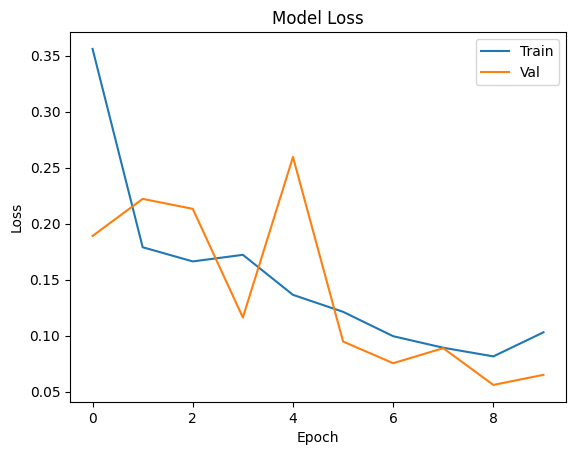

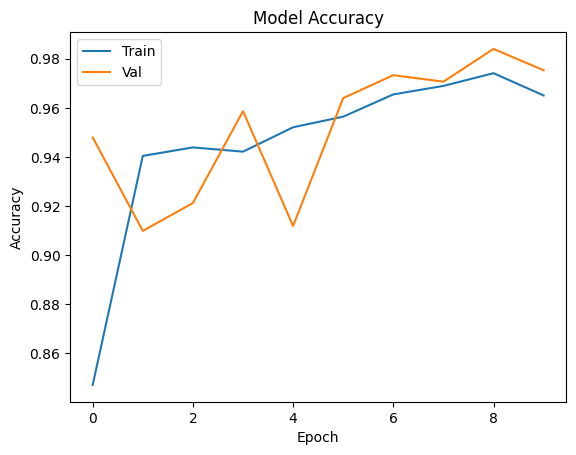

In [26]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()


In [27]:
# import tensorflow as tf
# import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.models import load_model

# Set the path to the trained model file
# model_path = 'plant_classifier_model.h5'

# Load the trained model
# model = load_model(model_path)

# Set the image dimensions
img_width, img_height = 224, 224

# Define the classify_image function
def classify_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(img_width, img_height))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Reshape the array to match the input shape of the model
    img_array = img_array.reshape((1, img_width, img_height, 3))
    # Preprocess the image
    img_array = img_array / 255.0
    # Predict the class label
    prediction = model.predict(img_array)
    # Map the class label to a human-readable string
    if prediction < 0.5:
        return 'Not a plant'
    else:
        return 'Plant'


In [33]:
img_path = "/content/jm.jpeg"
result = classify_image(img_path)
print(result)


1/1 [==============================] - 0s 21ms/step
Not a plant
